This note book realizes adaptive fuzzy neural network with Numpy

The architecture of AFNN as folow:
![](https://www.researchgate.net/profile/Ahmed_Hafaifa/publication/305519718/figure/fig4/AS:391662376374286@1470390995677/Adaptive-fuzzy-neural-network-with-inference-system.png)

where:
- layer 1: **Fuzzification layer**: $A_{ij} \rightarrow \mu_{ij}(x_i=A_{ij})$
- layer 2: **Rule operation layer**: $\displaystyle \Pi_r = \prod_{i=1,\ x_i=A_{ij}}^{m}\mu_{ij}(x_i=A_{ij})$
- layer 3: **Normalization layer**: $\displaystyle \overline{w}_r = \frac{w_r}{\sum_{r'}w_{r'}}$
- layer 4: **Consequent layer**: $c_r = \overline{w}_rf_r$
- layer 5: **Aggregation layer**: $\hat{y}=\sum_{r}\overline{w}_rf_r$
- All $f_r$ are found by minimum objective function based on true values ($y_k$) and predicted values ($\hat{y}_k$)
- Finally rules can be expressed as:
$$
\mathbf{If\ } x_1 = A_{11} \mathbf{\ and\ } x_1 = A_{21} \mathbf{\ and...\ then\ } y=f_1 \text{ and so on ...}
$$

## Membership functions Definition
### Gaussian fuzzy membership function
$$
\mu_{\mu, \sigma}(x)=\exp \left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$
#### Derivatives
$$
\frac{\partial \mu_{\mu, \sigma}(x)}{\partial x} = \mu_{\mu, \sigma}(x)\cdot\frac{\mu-x}{\sigma^2}\\
\frac{\partial \mu_{\mu, \sigma}(x)}{\partial \mu} = \mu_{\mu, \sigma}(x)\cdot\frac{x-\mu}{\sigma^2}\\
\frac{\partial \mu_{\mu, \sigma}(x)}{\partial \sigma} = \mu_{\mu, \sigma}(x)\frac{(x-\mu)^2}{\sigma^3}
$$

### Generalized Bell membership function 
$$
\displaystyle \mu_{a,b,c}(x) = \frac{1}{1+\left|\frac{x-c}{a}\right|^{2b}}
$$
#### Derivatives
$$
\frac{\partial \mu_{a,b,c}(x)}{\partial x} = -\frac{1}{\mu_{a,b,c}^2(x)}\left|\frac{x-c}{a}\right|^{2b-2}\frac{2b(c-x)}{a^2}\\
\frac{\partial \mu_{a,b,c}(x)}{\partial c} = -\frac{1}{\mu_{a,b,c}^2(x)}\left|\frac{x-c}{a}\right|^{2b-2}\frac{2b(c-x)}{a^2}\\
\frac{\partial \mu_{a,b,c}(x)}{\partial a} = -\frac{1}{\mu_{a,b,c}^2(x)}\left|\frac{x-c}{a}\right|^{2b}\frac{2b}{a}\\
\frac{\partial \mu_{a,b,c}(x)}{\partial b} = -\frac{1}{\mu_{a,b,c}^2(x)}\left|\frac{x-c}{a}\right|^{2b}\cdot 2\ln\left|\frac{x-c}{a}\right|
$$

### Generalized sigmoid membership function 
$$
\mu_{b,c}(x) = \frac{1}{1+e^{-c(x-b)}}
$$
#### Derivatives
$$
\frac{\partial \mu_{b,c}(x)}{\partial x} = \frac{c\cdot e^{-c(x-b)}}{\mu^2_{b,c}(x)}\\
\frac{\partial \mu_{b,c}(x)}{\partial b} = \frac{-c \cdot e^{-c(x-b)}}{\mu^2_{b,c}(x)}\\
\frac{\partial \mu_{b,c}(x)}{\partial c} = \frac{(x-b)\cdot e^{-c(x-b)}}{\mu^2_{b,c}(x)}
$$

## Membership functions Implement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import copy

In [2]:
def gaussmf(x, mean, sigma):
    """
    Gaussian fuzzy membership function.

    Parameters
    ----------
    x : 1d array or iterable
        Independent variable.
    mean : float
        Gaussian parameter for center (mean) value.
    sigma : float
        Gaussian parameter for standard deviation.

    Returns
    -------
    y : 1d array
        Gaussian membership function for x.
    """
    return np.exp(-((x - mean)**2.) / (2 * sigma**2.))

In [3]:
def gbellmf(x, a, b, c):
    """
    Generalized Bell function fuzzy membership generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    a : float
        Bell function parameter controlling width. See Note for definition.
    b : float
        Bell function parameter controlling slope. See Note for definition.
    c : float
        Bell function parameter defining the center. See Note for definition.

    Returns
    -------
    y : 1d array
        Generalized Bell fuzzy membership function.

    Notes
    -----
    Definition of Generalized Bell function is:

        y(x) = 1 / (1 + abs([x - c] / a) ** [2 * b])
    """
    return 1. / (1. + np.abs((x - c) / a) ** (2 * b))

In [4]:
def sigmf(x, b, c):
    """
    The basic sigmoid membership function generator.

    Parameters
    ----------
    x : 1d array
        Data vector for independent variable.
    b : float
        Offset or bias.  This is the center value of the sigmoid, where it
        equals 1/2.
    c : float
        Controls 'width' of the sigmoidal region about `b` (magnitude); also
        which side of the function is open (sign). A positive value of `a`
        means the left side approaches 0.0 while the right side approaches 1.;
        a negative value of `c` means the opposite.

    Returns
    -------
    y : 1d array
        Generated sigmoid values, defined as y = 1 / (1. + exp[- c * (x - b)])

    Notes
    -----
    These are the same values, provided separately and in the opposite order
    compared to the publicly available MathWorks' Fuzzy Logic Toolbox
    documentation. Pay close attention to above docstring!
    """
    return 1. / (1. + np.exp(- c * (x - b)))

#### Graph

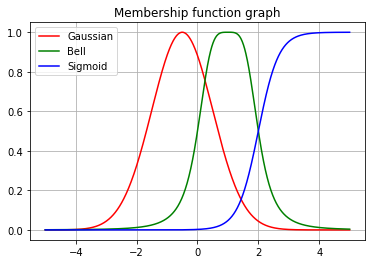

In [5]:
x = np.array(range(-500, 501))/100
gau = gaussmf(x=x, mean=-0.5, sigma=1)
bell = gbellmf(x=x, a=1, b=2, c=1)
sig = sigmf(x=x, b=2, c=3)

plt.plot(x, gau, 'r', label='Gaussian')
plt.plot(x, bell, 'g', label='Bell')
plt.plot(x, sig, 'b', label='Sigmoid')
plt.title('Membership function graph')
plt.grid(True)
plt.legend()

## Membership function class

In [6]:
class MemFuncs:
    """Common base class for all employees"""
    
    funcDict = {'gaussmf': gaussmf, 'gbellmf': gbellmf, 'sigmf': sigmf}

    def __init__(self, MFList):
        """
        Initialise
        MFList structure
        MFList = [ListMF0, ListMF1, ...]
        ListMF = [MF0, MF1, ...]
        MF = ['membership_function_name', {'membership_function_parameter': values, ...}]
        
        See the example below for more detail
        
        Number of ListMF = input dimmesion = m in the graph at the beginning
        Number of MF can be the same for all variable (homogenous) or different for each
        It is recommend to set these number are the same to work with Numpy
        """
        self.MFList = MFList

    def evaluateMF(self, rowInput):
        """
        Evaluate membership function from rowInput
        The code below use i to index MFList for i-th row
        and k to index MFs for a specified row in rowInput
        
        len(rowInput) should be equal to number of MFList
        If len(rowInput) > len(MFList) there will be warning and results
        If len(rowInput) < len(MFList) there will be warning and 
        """
        
        if len(rowInput) != len(self.MFList):
            print("Number of variables does not match number of rule sets")
            
        return np.array([
            [
                self.funcDict[
                    self.MFList[i][k][0]
                ](rowInput[i],**self.MFList[i][k][1]) 
                for k in range(len(self.MFList[i]))
            ] 
            for i in range(len(rowInput))
        ])

In [8]:
MFList = [
    [
        ['gaussmf', {'mean':0.,'sigma':1.}],
        ['gaussmf', {'mean':-1.,'sigma':2.}],
        ['gaussmf', {'mean':-4.,'sigma':10.}],
        ['gaussmf', {'mean':-7.,'sigma':7.}]
    ],
    [
        ['gaussmf', {'mean':1.,'sigma':2.}],
        ['gaussmf', {'mean':2.,'sigma':3.}],
        ['gaussmf', {'mean':-2.,'sigma':10.}],
        ['gaussmf', {'mean':-10.5,'sigma':5.}]
    ]
]

mfca = MemFuncs(MFList)
var_test = np.array([np.array([2, 3, 4, 5]),
                     np.array([3, 4, 5])])

mfca.evaluateMF(var_test)
# There must be array of two arrays
# first with (4,4) shape
# second for (4,3) shape

array([[array([1.35335283e-01, 1.11089965e-02, 3.35462628e-04, 3.72665317e-06]),
        array([0.32465247, 0.13533528, 0.04393693, 0.011109  ]),
        array([0.83527021, 0.78270454, 0.72614904, 0.66697681]),
        array([0.43756474, 0.36044779, 0.29092381, 0.2300663 ])],
       [array([0.60653066, 0.32465247, 0.13533528]),
        array([0.94595947, 0.8007374 , 0.60653066]),
        array([0.8824969 , 0.83527021, 0.78270454]),
        array([0.02612141, 0.01492079, 0.0081887 ])]], dtype=object)

## Membership function derivatives

In [9]:
def dgaussmfMean(x, mean, sigma):
    """
    Derivative gaussian membership function by mean
    np.exp(-((x - mean)**2.) / (2 * sigma**2.))
    """
    return (1./sigma**2) *(x-mean) * gaussmf(x, mean, sigma)
 

def dgaussmfSigma(x, mean, sigma):
    """
    Derivative gaussian membership function by sigma
    """
    return (1./sigma**3) * (x-mean)**2 * gaussmf(x, mean, sigma)


def dgbellmfA(x, a, b, c):
    """
    Derivative bell membership function by a
    """
    return gbellmf(x,a,b,c)*(1-gbellmf(x,a,b,c))*2.*b/a


def dgbellmfB(x, a, b, c):
    """
    Derivative bell membership function by b
    """
    return -2*gbellmf(x, a, b, c)*(1-gbellmf(x, a, b, c))*np.log(np.abs((x-c)/a)) 
                

def dgbellmfC(x, a, b, c):
    """
    Derivative bell membership function by c
    """
    return -2.*b/(c-x) * gbellmf(x, a, b, c)*(1-gbellmf(x, a, b, c))


def dsigmfB(x, b, c):
    """
    Derivative sigmoid membership function by b
    1. / (1. + np.exp(- c * (x - b)))
    
    """
    return -c * (1-sigmf(x, b, c)) * sigmf(x, b, c)
    
    
def dsigmfC(x, b, c):
    """
    Derivative sigmoid membership function by c
    """
    return (x - b) * (1-sigmf(x, b, c)) * sigmf(x, b, c)

In [10]:
def partial_dMF(x, mf_definition, partial_parameter):
    """
    Calculates the partial derivative of a membership function at a point x.
    This is for back-propagation over parameter
    Parameters
    x: input variable
    mf_definition: membership funtion definition, 
    e.g.: ['gaussmf', {'mean':0.,'sigma':1.}]
    partial_parameter: parameter to gte derivative
    ------
    Returns
    derivative of membership function by parameter
    ------
    """
    result = 0
    # get function name
    mf_name = mf_definition[0]
    
    # Gaussian membership function derivatives
    if mf_name == 'gaussmf':
        # get parameters
        sigma = mf_definition[1]['sigma']
        mean = mf_definition[1]['mean']
        # calculate derivatives
        if partial_parameter == 'sigma':   # dMf/dSigma
            result = dgaussmfSigma(x, mean, sigma)
        elif partial_parameter == 'mean':  # dMf/dMean
            result = dgaussmfMean(x, mean, sigma)
    
    # Bell membership function derivatives
    elif mf_name == 'gbellmf':
        # get parameters
        a = mf_definition[1]['a']
        b = mf_definition[1]['b']
        c = mf_definition[1]['c']
        # calculate derivatives
        if partial_parameter == 'a':    # dMf/da
            result = dgbellmfA(x, a, b, c)
        elif partial_parameter == 'b':  # dMf/db
            result = dgbellmfB(x, a, b, c)
        elif partial_parameter == 'c':  # dMf/dc 
            result = dgbellmfC(x, a, b, c)
    
    # General sigmoid membership function derivatives
    elif mf_name == 'sigmf':
        # get parameters
        b = mf_definition[1]['b']
        c = mf_definition[1]['c']
        # calculate derivatives
        if partial_parameter == 'b':    # dMf/db
            result = dsigmfB(x, b, c)
        elif partial_parameter == 'c':  # dMf/dc
            result = dsigmfC(x, b, c)

    return result

### Test derivatives
Estimated
$$\widehat{\frac{\partial f(x)}{\partial x}}=\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}\text{ where } \epsilon \approx 0
$$
#### Gausian

In [11]:
funDict = {'gaussmf': gaussmf, 'gbellmf': gbellmf, 'sigmf': sigmf}
mfdef = ['gaussmf', {'mean':0.,'sigma':1.}]
xtest = 0.5
eps = 0.001
ets_der = (funDict[mfdef[0]](xtest, mfdef[1]['mean']+eps, mfdef[1]['sigma'])\
           -funDict[mfdef[0]](xtest, mfdef[1]['mean']-eps, mfdef[1]['sigma']))/(2*eps)
ets_cal = partial_dMF(xtest, mfdef, 'mean')

print("Mean's difference:", ets_der - ets_cal)

ets_der = (funDict[mfdef[0]](xtest, mfdef[1]['mean'], mfdef[1]['sigma']+eps)\
           -funDict[mfdef[0]](xtest, mfdef[1]['mean'], mfdef[1]['sigma']-eps))/(2*eps)
ets_cal = partial_dMF(xtest, mfdef, 'sigma')
print("Sigma's difference:", ets_der - ets_cal)

Mean's difference: -2.022388480016346e-07
Sigma's difference: 3.608129017229622e-07


#### Bell function

In [12]:
mfdef = ['gbellmf', {'a': -1.5,'b': 2, 'c': -2.}]
xtest = 0.5
eps = 0.01

ets_der = (funDict[mfdef[0]](xtest, mfdef[1]['a']+eps, mfdef[1]['b'], mfdef[1]['c']) - \
          funDict[mfdef[0]](xtest, mfdef[1]['a']-eps, mfdef[1]['b'], mfdef[1]['c']))\
          /(2*eps)
ets_cal = partial_dMF(xtest, mfdef, 'a')

print("a's difference:", ets_der - ets_cal)

ets_der = (funDict[mfdef[0]](xtest, mfdef[1]['a'], mfdef[1]['b']+eps, mfdef[1]['c']) - \
          funDict[mfdef[0]](xtest, mfdef[1]['a'], mfdef[1]['b']-eps, mfdef[1]['c']))\
          /(2*eps)
ets_cal = partial_dMF(xtest, mfdef, 'b')

print("b's difference:", ets_der - ets_cal)

ets_der = (funDict[mfdef[0]](xtest, mfdef[1]['a'], mfdef[1]['b'], mfdef[1]['c']+eps) - \
          funDict[mfdef[0]](xtest, mfdef[1]['a'], mfdef[1]['b'], mfdef[1]['c']-eps))\
          /(2*eps)
ets_cal = partial_dMF(xtest, mfdef, 'c')

print("c's difference:", ets_der - ets_cal)

a's difference: 2.0002207765656976e-06
b's difference: -7.050712671347048e-07
c's difference: 7.5819991969539036e-06


#### Sigmoid function

In [13]:
mfdef = ['sigmf', {'b': 1, 'c': 2.}]
xtest = 0.6
eps = 0.001

ets_der = (funDict[mfdef[0]](xtest, mfdef[1]['b']+eps, mfdef[1]['c']) - \
          funDict[mfdef[0]](xtest, mfdef[1]['b']-eps, mfdef[1]['c']))\
          /(2*eps)
ets_cal = partial_dMF(xtest, mfdef, 'b')

print("b's difference:", ets_der - ets_cal)

ets_der = (funDict[mfdef[0]](xtest, mfdef[1]['b'], mfdef[1]['c']+eps) - \
          funDict[mfdef[0]](xtest, mfdef[1]['b'], mfdef[1]['c']-eps))\
          /(2*eps)
ets_cal = partial_dMF(xtest, mfdef, 'c')

print("c's difference:", ets_der - ets_cal)

b's difference: 8.084596164747992e-08
c's difference: 6.467923002739795e-10


**As differences are closed to 0, our derivative functions were correctly defined**

## ANFIS class implement

In [14]:
def LSE(A, B, initialGamma = 1000.):
    """
    Use least squared estimation to find LSE(A,B) that
    A.dot(LSE(A, B)) ~ B
    This function is used to fined coefficients between layer 4 & 5
    where A.shape[0] = number of rules
    if A.shape[0] is very big, this function will slowly execute
    """
    
    coeffMat = np.array(A)
    rhsMat = np.array(B)

    S = np.eye(coeffMat.shape[1])*initialGamma
    x = np.zeros((coeffMat.shape[1], 1))
    
    for i in range(coeffMat.shape[0]):
        a = np.matrix(coeffMat[i])
        b = np.matrix(rhsMat[i])
        S = S - S.dot(a.T).dot(a).dot(S)/(1+a.dot(S).dot(a.T))
        x = x + S.dot(a.T).dot(b-a.dot(x))
    return x

In [ ]:
# This part is quite long!!!
class ANFIS(object):
    """Class to implement an Adaptive Network Fuzzy Inference System: ANFIS"

    Attributes:
        X - input
        Y - output
        XLen - input len
        memClass - membership function object
        memFuncs - membership function list
        memFuncsByVariable - membership function by variable
        
        rules - fuzzy rules
            if x1 gets value from [x11, x12]
               x2 gets value from [x21, x22]
            then rule 'x1 = x11 & x2 = x21' equivalent (0,0) and so on.  
               
        consequents - layerFour.dot(consequents) = layerFive
        errors - sum square(real values - predicted values)
        memFuncsHomo - true if there's the same number of membership functions 
        for all variables
            example
                if memFuncs = [[['gaussmf',...],['gaussmf', ...]],
                               [['gaussmf', ...],['gaussmf', ...]]]
                then memFuncsHomo = True (2 membership functions for each)
        trainingType - 'Not trained yet'/'trainHybridJangOffLine'
    """

    def __init__(self, X, Y, memFunction):
        """
        Initialise ANFIS instance from
        - input X = [[val1, val2, ...], [...]]
        - output Y [...]
        - membership function object memFunction [see: class MemFuncs]
        X.shape[0] - number of training sample
        X.shape[1] - number of inputs in fuzzy neural net
        """
        self.X = np.array(copy.copy(X))
        self.Y = np.array(copy.copy(Y))
        self.XLen = len(self.X)
        
        self.memClass = copy.deepcopy(memFunction)
        self.memFuncs = self.memClass.MFList
        
        # indexing membership function 
        self.memFuncsByVariable = [
            [x for x in range(len(self.memFuncs[z]))]
            for z in range(len(self.memFuncs))
        ]
        
        # list of possible rules = 
        # number of membership fuctions for 1st variable *
        # number of membership fuctions for 2nd variable ...
        self.rules = np.array(list(itertools.product(*self.memFuncsByVariable)))
        
        self.consequents = \
        np.zeros(self.Y.ndim * len(self.rules) * (self.X.shape[1] + 1))
        self.errors = np.empty(0)
        
        self.memFuncsHomo = all(
            len(i)==len(self.memFuncsByVariable[0]) 
            for i in self.memFuncsByVariable
        )
        
        self.trainingType = 'Not trained yet'

    def trainHybridJangOffLine(self, epochs=5, tolerance=1e-5, initialGamma=1000, k=0.01):
        """
        Training fuzzy neural network (update parameters of membership functions)
        epochs: number of epochs
        tolerance: tolerance to stop updating parameters 
        initialGamma: used to find LSE(A, B)
        k: learning rate
        Return predicted values
        """

        self.trainingType = 'trainHybridJangOffLine'
        convergence = False
        epoch = 1

        while (epoch <= epochs) and (convergence is not True):

            #layer four: forward pass
            [layerFour, wSum, w] = self.forwardHalfPass(self.X)

            #layer five: least squares estimate
            layerFive = np.array(LSE(layerFour,self.Y,initialGamma))
            self.consequents = layerFive
            
            # layer five, final forward pass
            layerFive = layerFour.dot(layerFive)

            # error - RMSE
            error = np.sum((self.Y-layerFive.T)**2)/self.Y.shape[0]
            error = np.sqrt(error)
            print('Epoch --%d/%d-- Train error --%.9f--' % (epoch, epochs, error))
            # MAE
            # average_error = np.average(np.absolute(self.Y-layerFive.T))
            self.errors = np.append(self.errors,error)

            if len(self.errors) != 0:
                if self.errors[len(self.errors)-1] < tolerance:
                    convergence = True

            # back propagation
            if convergence is not True:
                cols = range(self.X.shape[1])
                dE_dAlpha = list(self.backprop(colX, cols, wSum, w, layerFive) 
                                 for colX in range(self.X.shape[1]))


            if len(self.errors) >= 4:
                if (self.errors[-4] > self.errors[-3] > \
                    self.errors[-2] > self.errors[-1]):
                    k = k * 1.1

            if len(self.errors) >= 5:
                if (self.errors[-1] < self.errors[-2]) \
                   and (self.errors[-3] < self.errors[-2]) \
                   and (self.errors[-3] < self.errors[-4]) \
                   and (self.errors[-5] > self.errors[-4]):
                    k = k * 0.9

            # handling of variables with a different number of MFs
            t = []
            for x in range(len(dE_dAlpha)):
                for y in range(len(dE_dAlpha[x])):
                    for z in range(len(dE_dAlpha[x][y])):
                        t.append(dE_dAlpha[x][y][z])

            eta = k / np.abs(np.sum(t))  # learning rate

            if(np.isinf(eta)):
                eta = k

            ## handling of variables with a different number of MFs
            dAlpha = copy.deepcopy(dE_dAlpha)
            if not(self.memFuncsHomo):
                for x in range(len(dE_dAlpha)):
                    for y in range(len(dE_dAlpha[x])):
                        for z in range(len(dE_dAlpha[x][y])):
                            dAlpha[x][y][z] = -eta * dE_dAlpha[x][y][z]
            else:
                dAlpha = -eta * np.array(dE_dAlpha)

            # update parameters
            for varsWithMemFuncs in range(len(self.memFuncs)):
                for MFs in range(len(self.memFuncsByVariable[varsWithMemFuncs])):
                    paramList = sorted(self.memFuncs[varsWithMemFuncs][MFs][1])
                    for param in range(len(paramList)):
                        self.memFuncs[varsWithMemFuncs][MFs][1][paramList[param]] \
                        = self.memFuncs[varsWithMemFuncs][MFs][1][paramList[param]] \
                        + dAlpha[varsWithMemFuncs][MFs][param]
            epoch = epoch + 1


        self.fittedValues = self.predict(self.X)
        self.residuals = self.Y - self.fittedValues[:,0]

    def plotErrors(self):
        """
        Show training error vs epoch number
        """
        if self.trainingType == 'Not trained yet':
            print(self.trainingType)
        else:
            plt.plot(range(1, len(self.errors)+1),self.errors,'ro', label='errors')
            plt.ylabel('error')
            plt.xlabel('epoch')
            plt.title('Training error vs. epoch number')
            plt.grid(True)
            plt.show()

    def plotMF(self, x, inputVar):
        """
        Plot graph of membership function
        x: 1-D array
        inputVar: index of variable, of which we take membership functions
        """
        for mf in range(len(self.memFuncs[inputVar])):
            if self.memFuncs[inputVar][mf][0] == 'gaussmf':
                y = gaussmf(x,**self.memClass.MFList[inputVar][mf][1])
            elif self.memFuncs[inputVar][mf][0] == 'gbellmf':
                y = gbellmf(x,**self.memClass.MFList[inputVar][mf][1])
            elif self.memFuncs[inputVar][mf][0] == 'sigmf':
                y = sigmf(x,**self.memClass.MFList[inputVar][mf][1])
            plt.plot(x,y, label='MF '+ str(mf+1))

        plt.grid('True')
        plt.title('Trained membership functions, %d variable' %(inputVar+1))
        plt.legend()
        plt.grid(True)
        plt.show()

    def plotResults(self):
        """
        Plot predicted values vs true values
        only for 1-D true values
        """
        if self.trainingType == 'Not trained yet':
            print(self.trainingType)
        else:
            plt.plot(range(len(self.fittedValues)),
                     self.fittedValues,'r', 
                     label='trained')
            plt.plot(range(len(self.Y)),self.Y,'b', label='original')
            plt.legend(loc='upper left')
            plt.grid(True)
            plt.title('Original and predicted values')
            plt.show()
            
            
    def forwardHalfPass(self, Xs):
        """
        Fuzzy neural network forward propagation from Xs (half pass)
        return layerFour (not the last layer),
               w and wSum: weight and sum weight for each example
               these are for back propagation
        """
        layerFour = np.empty(0,)
        wSum = []

        for pattern in range(Xs.shape[0]):
            # pattern = X sample to run forward pass
            
            # layer one - fuzzification layers
            # take the pattern-th sample and pass to the neural network
            layerOne = self.memClass.evaluateMF(Xs[pattern,:])

            # layer two
            # len(self.rules[0]) = dimmension of each pattern
            # len(self.rules) = number of possible rules
            # First build all possible combinations of membership function values
            # from [x1, x2, ..., xm]
            
            miAlloc = [
                [
                    layerOne[x][self.rules[row][x]]
                    for x in range(len(self.rules[0]))
                ] 
                for row in range(len(self.rules))
            ]  # values of membership functions
            
            # Then take the product of each combination
            # use .T operator to enssure that output is shaped (1, number of rules)
            layerTwo = np.array([np.product(comb) for comb in miAlloc]).T
            
            # Vertically stack  
            if pattern == 0:  # in case ONE input
                w = layerTwo
            else:
                w = np.vstack((w,layerTwo))

            # layer three
            wSum.append(np.sum(layerTwo))
            layerThree = layerTwo/wSum[pattern]
            
            if pattern == 0:
                wNormalized = layerTwo/wSum[pattern]
            else:
                wNormalized = np.vstack((wNormalized,layerTwo/wSum[pattern]))

            # prep for layer four (bit of a hack)
            # add 1-column (bias) then append to layerFour
            rowHolder = np.concatenate([x*np.append(Xs[pattern,:],1) 
                                        for x in layerThree])
            layerFour = np.append(layerFour,rowHolder)

        # layer four
        layerFour = np.array(np.array_split(layerFour,pattern + 1))

        return layerFour, wSum, w.T

    def backprop(self, columnX, columns, theWSum, theW, theLayerFive):
        
        """
        back propagation for fuzzy neural network
        columnX: column in input matrix self.X
        columns: list of column indices of self.X
        theWSum: sum of weights in forward half pass
        theW: weights in forward half pass
        theLayerFive: predicted value by FANN
        
        Return steps to update parameters in membership function list
        """

        paramGrp = [0]* len(self.memFuncs[columnX])
        for MF in range(len(self.memFuncs[columnX])):   
            # for each membership function of columnX-th variable
            
            # get number of parameters
            parameters = np.empty(len(self.memFuncs[columnX][MF][1]))
            timesThru = 0
            
            for alpha in sorted(self.memFuncs[columnX][MF][1].keys()):
                # for each parameter of membership function
                
                bucket3 = np.empty(len(self.X))
                for rowX in range(len(self.X)):
                    # for each sample
                    
                    # get value of variable (x)
                    varToTest = self.X[rowX,columnX]   # x
                    tmpRow = np.empty(len(self.memFuncs))
                    tmpRow.fill(varToTest)

                    bucket2 = np.empty(self.Y.ndim)
                    for colY in range(self.Y.ndim):

                        rulesWithAlpha = np.array(
                            np.where(self.rules[:,columnX]==MF)
                        )[0]
                        adjCols = np.delete(columns,columnX)

                        # get derivative of selected parameter alpha
                        senSit = partial_dMF(
                            x=self.X[rowX,columnX],
                            mf_definition=self.memFuncs[columnX][MF],
                            partial_parameter=alpha
                        )
                        
                        # produces d_ruleOutput/d_parameterWithinMF
                        dW_dAplha = senSit * \
                        np.array(
                            [np.prod(
                              [self.memClass.evaluateMF(tmpRow)[c][self.rules[r][c]]
                              for c in adjCols]
                            ) 
                            for r in rulesWithAlpha]
                        )

                        bucket1 = np.empty(self.rules.shape[0])
                        for consequent in range(self.rules.shape[0]):
                            # for each rule
                            fConsequent = np.append(self.X[rowX,:],1.)\
                                            .dot(
                                self.consequents[
                                    ((self.X.shape[1] + 1) * consequent):
                                    ((self.X.shape[1] + 1) * (consequent + 1)),
                                    colY]
                            )
                            
                            acum = 0
                            if consequent in rulesWithAlpha:
                                acum = dW_dAplha[np.where(rulesWithAlpha==consequent)] \
                                * theWSum[rowX]

                            acum = acum - theW[consequent,rowX] * np.sum(dW_dAplha)
                            acum = acum / theWSum[rowX]**2
                            bucket1[consequent] = fConsequent * acum

                        sum1 = np.sum(bucket1)

                        if self.Y.ndim == 1:
                            bucket2[colY] = \
                            sum1 * (self.Y[rowX]-theLayerFive[rowX,colY])*(2)
                        else:
                            bucket2[colY] = \
                            sum1 * (self.Y[rowX,colY]-theLayerFive[rowX,colY])*(2)

                    sum2 = np.sum(bucket2)
                    bucket3[rowX] = sum2

                sum3 = np.sum(bucket3)
                parameters[timesThru] = sum3
                timesThru = timesThru + 1

            paramGrp[MF] = parameters

        return paramGrp


    def predict(self, varsToTest):
        """
        Calculate predicted value for varsToTest
        The number of columns in varsToTest must equal len(self.MFList)
        """
        [layerFour, wSum, w] = self.forwardHalfPass(varsToTest)

        #layer five
        layerFive = layerFour.dot(self.consequents)

        return layerFive

## ANFIS testing
### Preparing

In [ ]:
# read data for model
ts = np.loadtxt("/home/hung/githubtest/anfis/anfistest/trainingSet.txt", usecols=[1,2,3])
X = ts[:,0:2]
Y = ts[:,2]

# initialize membership function's parameters
mf = \
[
    [
        ['gaussmf', {'mean':0.,'sigma':1.}],
        ['gaussmf', {'mean':-1.,'sigma':2.}],
        ['gaussmf', {'mean':-4.,'sigma':10.}],
        ['gaussmf', {'mean':-7.,'sigma':7.}]
    ],
    [
        ['gaussmf', {'mean':1.,'sigma':2.}],
        ['gaussmf', {'mean':2.,'sigma':3.}],
        ['gaussmf', {'mean':-2.,'sigma':10.}],
        ['gaussmf', {'mean':-10.5,'sigma':5.}]
    ]
]

### Data visulization

In [ ]:
# 2D plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], Y, label='1st var', c='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X[:, 1], Y, label='2nd var', c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()

plt.figure(figsize=(10,5))
plt.plot(X[:, 0], label='X0')
plt.plot(X[:, 1], label='X1')
plt.grid(True)
plt.legend()

In [ ]:
# 3D visulization of train data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=Y,
           zdir='z', s=10, c=None, )
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

### Train the model

In [ ]:
# initialize model
anf = ANFIS(X=X, Y=Y, memFunction=MemFuncs(mf))

In [ ]:
# train model
anf.trainHybridJangOffLine(epochs=10, k=0.01)

### Result exploration

In [ ]:
# plot results
anf.plotErrors()
anf.plotResults()

### Membership function visulization

In [ ]:
xx = np.array(range(-5000, 5001))/100
yy = np.zeros((2,4,xx.shape[0]))
color = ['c', 'm', 'y', 'k']
for i in range(2):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title('Initial membership functions of %d-th variable'%(i+1))
    for j in range(4):
        mean = mf[i][j][1]['mean']
        sigma = mf[i][j][1]['sigma']
        yy[i,j,:] = gaussmf(xx, mean, sigma)
        plt.plot(xx, yy[i][j], label='MF '+str(j+1))
    plt.grid(True)
    plt.legend()
    
    plt.subplot(1,2,2)
    anf.plotMF(xx, i)
# anf.memFuncs

### Look into the values

In [ ]:
# Initial membership functions' parameter
mf

In [ ]:
# trained membership functions' parameter
anf.memFuncs

**The parameters changed a bit, not significantlty**

### Model evaluation and comparision

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(np.matrix(Y).transpose(), anf.predict(X)))
print('RMSE on train:', rmse)

In [ ]:
# from regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
print('Train RMSE with Sklearn: ', np.sqrt(mean_squared_error(Y, model.predict(X))))

plt.plot(Y, label='Train groud truth')
plt.plot(model.predict(X), label='Train prediction')
plt.grid(True)
plt.legend()

As we can see, the trained model by ANFIS is **better than pure linear regression model**. This is because of the nonlinearity of ANFIS. Furthermore, pure LR model has 3 parameters (two for weights and one for bias) while ANFIS has more paramerters: 16 for total 8 membership functions and 17 from LSE (transform layer 4 to layer 5).

In [ ]:
# linear regression model by formula
# Y = weight*X + bias
weight = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)
bias = Y.mean()-weight.dot(X.mean(axis=0).T)
print('Weight:', weight, '\nBias:', bias)

In [ ]:
# linear regression model coefficients
weight = model.coef_
bias = model.intercept_
print('Weight:', weight, '\nBias:', bias)

The weights are closed to 0, all predicted values were **just the bias**.